# Project Heart Disease 


## Define Problem Statement and Objectives

Problem Statement:

The aim is to leverage the Cleveland Heart Disease dataset, encompassing 303 individuals' records, to build a predictive model. This model will determine whether an individual is afflicted by heart disease or not based on various health attributes.

Objective:

Develop a robust classification model that accurately predicts the presence or absence of heart disease in individuals. Utilize the 14 key health attributes available in the dataset to create a reliable predictive tool. The objective is to achieve a high-performing model that aids in timely diagnosis and proactive intervention to mitigate potential heart disease risks in patients.



## Import all the necessary libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
import seaborn as sns


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Reading the Data into a DataFrame

In [6]:
df=pd.read_csv('dataset.csv')


## Explore the dataset and extract insights using Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [42]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
df.shape

(303, 14)

In [45]:
#Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
Exploratory Data Analysis

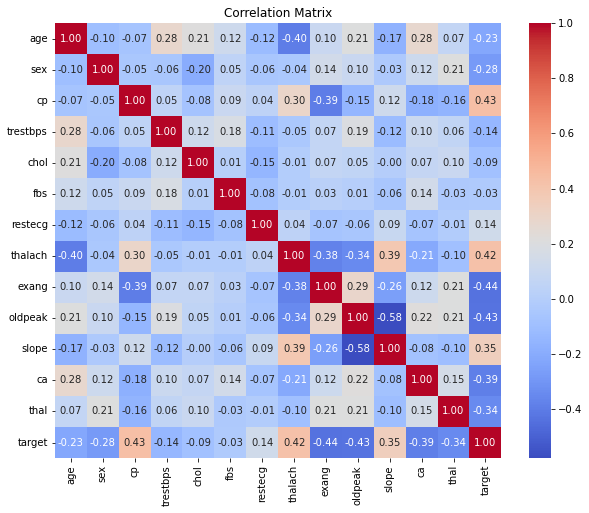

In [29]:
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

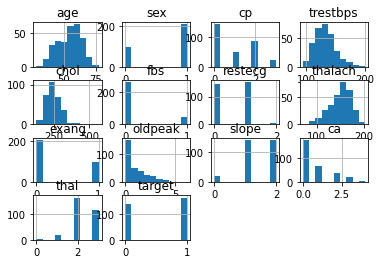

In [47]:
df.hist()

In [20]:
#To determine male vs female population with heart disease

sex_value_counts = df['sex'].value_counts()
sex_value_counts = df.sex.value_counts()
print (sex_value_counts)

1    207
0     96
Name: sex, dtype: int64


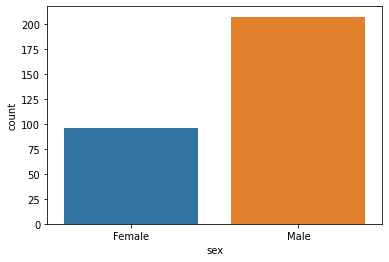

In [19]:
sns.countplot(x='sex', data=df)  # Specify the column name directly here
plt.xticks((0, 1), ['Female', 'Male'])
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

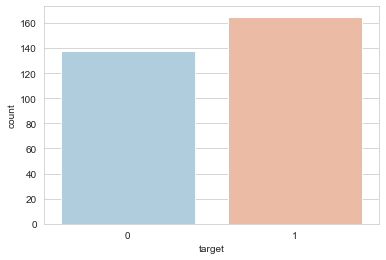

In [48]:
#See how balanced the data is by comparing those with heartdisease=1 and no heatrdisease

sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette ='RdBu_r')

In [31]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [53]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [33]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [34]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

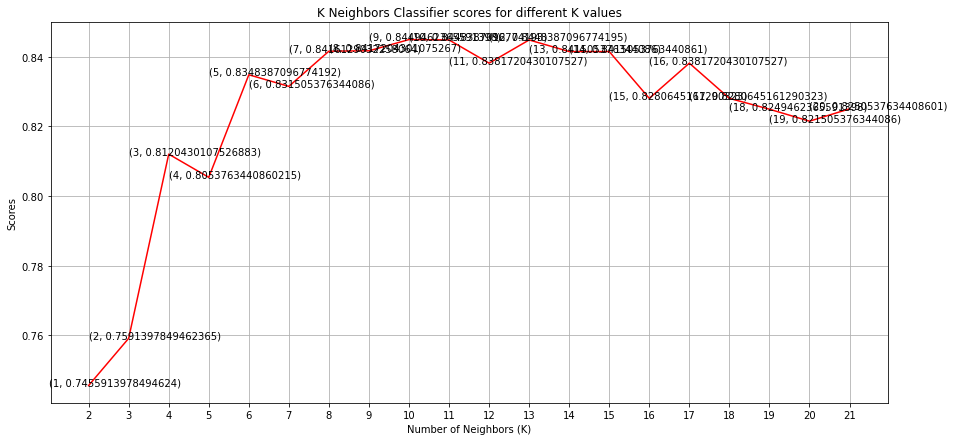

In [49]:

plt.figure(figsize=(15,7))
plt.plot([k for k in range(2, 22)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(2, 22)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.grid('T')
plt.title('K Neighbors Classifier scores for different K values')

In [73]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()


0.8448387096774195

In [ ]:
Random Forest Classifier

In [78]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

scores = cross_val_score(randomforest_classifier, X, y, cv=5)
mean_score = scores.mean()

print(f"Mean Score: {mean_score}")

Mean Score: 0.8052459016393442


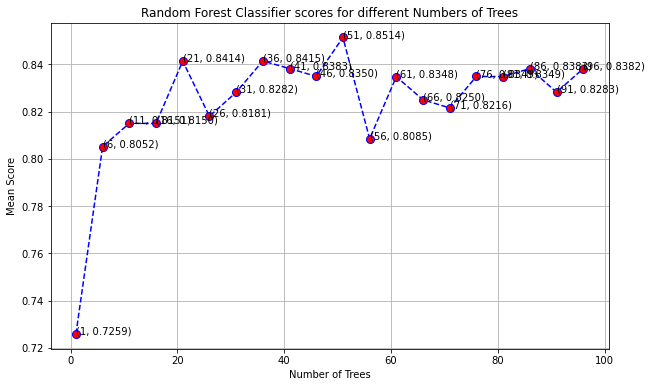

In [48]:
#List to store Random Forest scores for different numbers of trees
rf_scores = []

# Range of number of trees to consider
trees_range = range(1, 101, 5)  # Change the step size or range as needed

# Calculating scores for different numbers of trees using cross-validation
for trees in trees_range:
    random_forest = RandomForestClassifier(n_estimators=trees)
    scores = cross_val_score(random_forest, X, y, cv=5)
    rf_scores.append(scores.mean())


plt.figure(figsize=(10, 6))
plt.plot(trees_range, rf_scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
for i in range(len(trees_range)):
    plt.text(trees_range[i], rf_scores[i], f"({trees_range[i]}, {rf_scores[i]:.4f})")
plt.xlabel('Number of Trees')
plt.ylabel('Mean Score')
plt.title('Random Forest Classifier scores for different Numbers of Trees')
plt.grid(True)
plt.show()

___